In [331]:
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy import stats 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [332]:
data = pd.read_excel("loblaws.xlsx",sheet_name='E Comm')


In [333]:
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [335]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [336]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [337]:
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
data_encoded = pd.get_dummies(data, columns=categorical_columns)


In [338]:
imputer = KNNImputer()


In [339]:
data_imputed = pd.DataFrame(imputer.fit_transform(data_encoded), columns=data_encoded.columns)


In [340]:
data_imputed

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001.0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50002.0,1.0,2.6,1.0,8.0,3.0,4.0,3.0,7.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,50003.0,1.0,2.6,1.0,30.0,2.0,4.0,3.0,6.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,50004.0,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50005.0,1.0,0.0,1.0,12.0,2.6,3.0,5.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626.0,0.0,10.0,1.0,30.0,3.0,2.0,1.0,6.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5626,55627.0,0.0,13.0,1.0,13.0,3.0,5.0,5.0,6.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,55628.0,0.0,1.0,1.0,11.0,3.0,2.0,4.0,3.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5628,55629.0,0.0,23.0,3.0,9.0,4.0,5.0,4.0,4.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [341]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             5630 non-null   float64
 1   Churn                                  5630 non-null   float64
 2   Tenure                                 5630 non-null   float64
 3   CityTier                               5630 non-null   float64
 4   WarehouseToHome                        5630 non-null   float64
 5   HourSpendOnApp                         5630 non-null   float64
 6   NumberOfDeviceRegistered               5630 non-null   float64
 7   SatisfactionScore                      5630 non-null   float64
 8   NumberOfAddress                        5630 non-null   float64
 9   Complain                               5630 non-null   float64
 10  OrderAmountHikeFromlastYear            5630 non-null   float64
 11  Coup

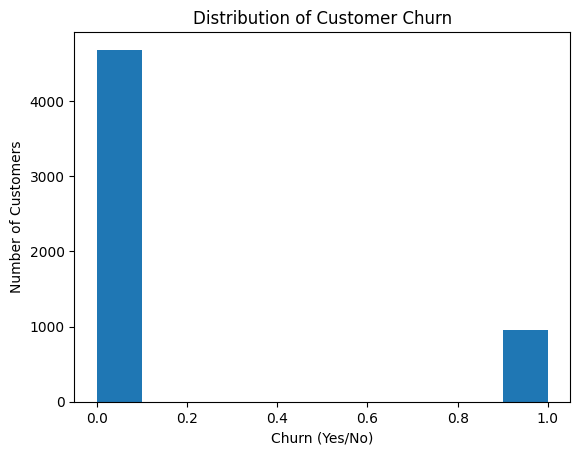

In [342]:
plt.hist(data_imputed['Churn'])
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Churn')
plt.show()

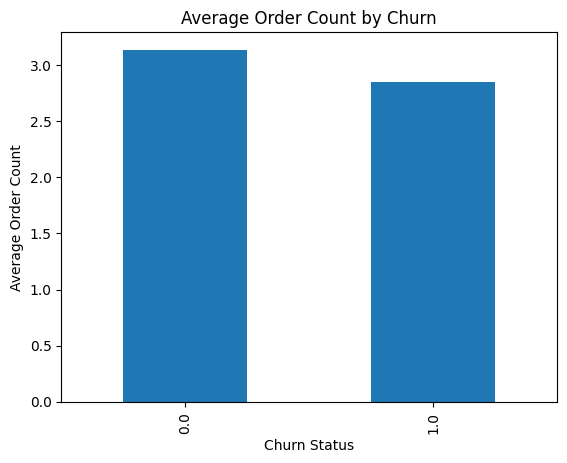

In [343]:
churn_grouped = data_imputed.groupby('Churn')['OrderCount'].mean()
churn_grouped.plot(kind='bar')
plt.xlabel('Churn Status')
plt.ylabel('Average Order Count')
plt.title('Average Order Count by Churn')
plt.show()

In [344]:
average_order_by_churn = data_imputed.groupby('Churn')['OrderCount'].mean()

print(average_order_by_churn)

Churn
0.0    3.138659
1.0    2.853797
Name: OrderCount, dtype: float64



Frequency table for PreferredPaymentMode_COD:
0.0    5265
1.0     365
Name: PreferredPaymentMode_COD, dtype: int64

Frequency table for PreferredPaymentMode_Cash on Delivery:
0.0    5481
1.0     149
Name: PreferredPaymentMode_Cash on Delivery, dtype: int64

Frequency table for PreferredPaymentMode_Credit Card:
0.0    4129
1.0    1501
Name: PreferredPaymentMode_Credit Card, dtype: int64

Frequency table for PreferredPaymentMode_Debit Card:
0.0    3316
1.0    2314
Name: PreferredPaymentMode_Debit Card, dtype: int64

Frequency table for PreferredPaymentMode_E wallet:
0.0    5016
1.0     614
Name: PreferredPaymentMode_E wallet, dtype: int64

Frequency table for PreferredPaymentMode_UPI:
0.0    5216
1.0     414
Name: PreferredPaymentMode_UPI, dtype: int64


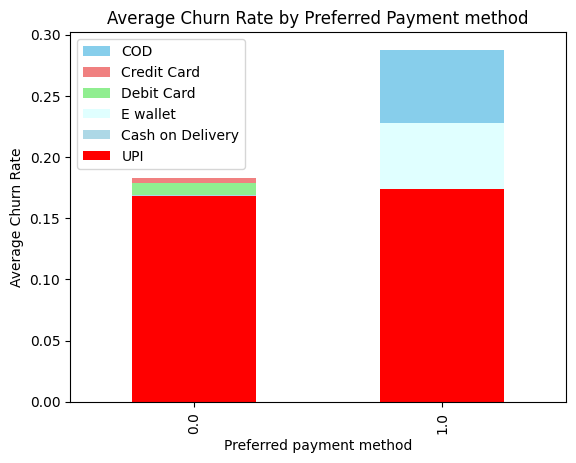

In [345]:
import pandas as pd
import matplotlib.pyplot as plt

for col in ['PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card','PreferredPaymentMode_Debit Card','PreferredPaymentMode_E wallet','PreferredPaymentMode_UPI']:
    print(f"\nFrequency table for {col}:")
    print(data_imputed[col].value_counts())


churn_by_pay_method = data_imputed.groupby('PreferredPaymentMode_COD')['Churn'].mean()
churn_by_pay_method.plot(kind='bar', color='skyblue', label='COD')
data_imputed.groupby('PreferredPaymentMode_Credit Card')['Churn'].mean().plot(kind='bar', color='lightcoral', label='Credit Card')
data_imputed.groupby('PreferredPaymentMode_Debit Card')['Churn'].mean().plot(kind='bar', color='lightgreen', label='Debit Card')
data_imputed.groupby('PreferredPaymentMode_E wallet')['Churn'].mean().plot(kind='bar', color='lightcyan', label='E wallet')
data_imputed.groupby('PreferredPaymentMode_Cash on Delivery')['Churn'].mean().plot(kind='bar', color='lightblue', label='Cash on Delivery')
data_imputed.groupby('PreferredPaymentMode_UPI')['Churn'].mean().plot(kind='bar', color='red', label='UPI')


plt.xlabel('Preferred payment method')
plt.ylabel('Average Churn Rate')
plt.title('Average Churn Rate by Preferred Payment method')
plt.legend()
plt.show()




Frequency table for PreferredLoginDevice_Computer:
0.0    3996
1.0    1634
Name: PreferredLoginDevice_Computer, dtype: int64

Frequency table for PreferredLoginDevice_Mobile Phone:
0.0    2865
1.0    2765
Name: PreferredLoginDevice_Mobile Phone, dtype: int64

Frequency table for PreferredLoginDevice_Phone:
0.0    4399
1.0    1231
Name: PreferredLoginDevice_Phone, dtype: int64


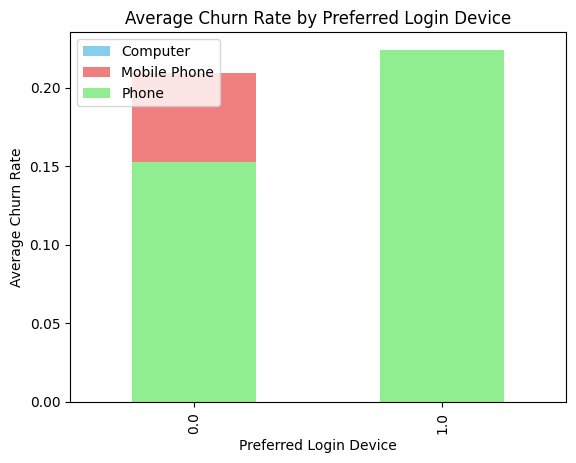

In [346]:
import pandas as pd
import matplotlib.pyplot as plt

for col in ['PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone']:
    print(f"\nFrequency table for {col}:")
    print(data_imputed[col].value_counts())


churn_by_login = data_imputed.groupby('PreferredLoginDevice_Computer')['Churn'].mean()
churn_by_login.plot(kind='bar', color='skyblue', label='Computer')
data_imputed.groupby('PreferredLoginDevice_Mobile Phone')['Churn'].mean().plot(kind='bar', color='lightcoral', label='Mobile Phone')
data_imputed.groupby('PreferredLoginDevice_Phone')['Churn'].mean().plot(kind='bar', color='lightgreen', label='Phone')
plt.xlabel('Preferred Login Device')
plt.ylabel('Average Churn Rate')
plt.title('Average Churn Rate by Preferred Login Device')
plt.legend()
plt.show()



In [347]:
data_imputed.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,...,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,9.989734,1.654707,15.595311,2.910302,3.688988,3.066785,4.214032,0.284902,...,0.601066,0.146714,0.072824,0.364121,0.143694,0.225755,0.046892,0.150622,0.530373,0.319005
std,1625.385339,0.374240,8.430120,0.915389,8.381103,0.713779,1.023999,1.380194,2.583586,0.451408,...,0.489723,0.353852,0.259871,0.481225,0.350811,0.418116,0.211426,0.357711,0.499121,0.466133
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.850000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52815.500000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [348]:
numerical_features = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress']
scaler = StandardScaler()
data_imputed[numerical_features] = scaler.fit_transform(data_imputed[numerical_features])


In [349]:
engagement_features = data_imputed[['HourSpendOnApp', 'OrderCount', 'DaySinceLastOrder']]
normalized_features = scaler.fit_transform(engagement_features)
inverted_day_since_last_order = 1 - (engagement_features['DaySinceLastOrder'] / engagement_features['DaySinceLastOrder'].max())
weights = [0.5, 0.3, 0.2]  
overall_engagement = (normalized_features[:, 0] * weights[0]) + \
                     (normalized_features[:, 1] * weights[1]) + \
                     (inverted_day_since_last_order * weights[2])
data_imputed['OverallEngagement'] = overall_engagement


In [350]:
data_imputed

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverallEngagement
0,50001.0,1.0,-0.710579,3.0,-1.144976,0.125678,-0.672900,-0.772992,1.852616,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.026589
1,50002.0,1.0,-0.876665,1.0,-0.906323,0.125678,0.303750,-0.048392,1.078430,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.048329
2,50003.0,1.0,-0.876665,1.0,1.718863,-1.275441,0.303750,-0.048392,0.691336,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.665274
3,50004.0,1.0,-1.185110,3.0,-0.071036,-1.275441,0.303750,1.400807,1.465523,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.665274
4,50005.0,1.0,-1.185110,1.0,-0.429016,-0.434770,-0.672900,1.400807,-0.469944,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.244939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626.0,0.0,0.001218,1.0,1.718863,0.125678,-1.649551,-1.497592,0.691336,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.133540
5626,55627.0,0.0,0.357116,1.0,-0.309690,0.125678,1.280401,1.400807,0.691336,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.137018
5627,55628.0,0.0,-1.066477,1.0,-0.548343,0.125678,-1.649551,0.676207,-0.469944,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.133540
5628,55629.0,0.0,1.543445,3.0,-0.786996,1.526797,1.280401,0.676207,-0.082850,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.812360


In [351]:
X = data_imputed.drop(columns=['Churn','CustomerID'], axis=1)  # Features (assuming 'Churn' is the target)
y = data_imputed['Churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [352]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
0,Tenure,0.199220
12,CashbackAmount,0.087749
2,WarehouseToHome,0.064939
11,DaySinceLastOrder,0.058929
7,Complain,0.057798
6,NumberOfAddress,0.054143
8,OrderAmountHikeFromlastYear,0.049876
34,OverallEngagement,0.049356
5,SatisfactionScore,0.042567
4,NumberOfDeviceRegistered,0.032732


In [353]:
top_n = 10

top_features = importance_df.nlargest(top_n, 'Importance')['Feature']


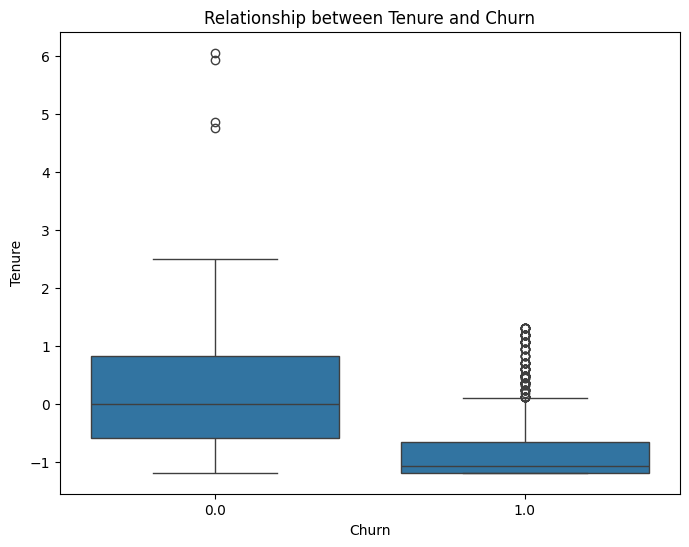

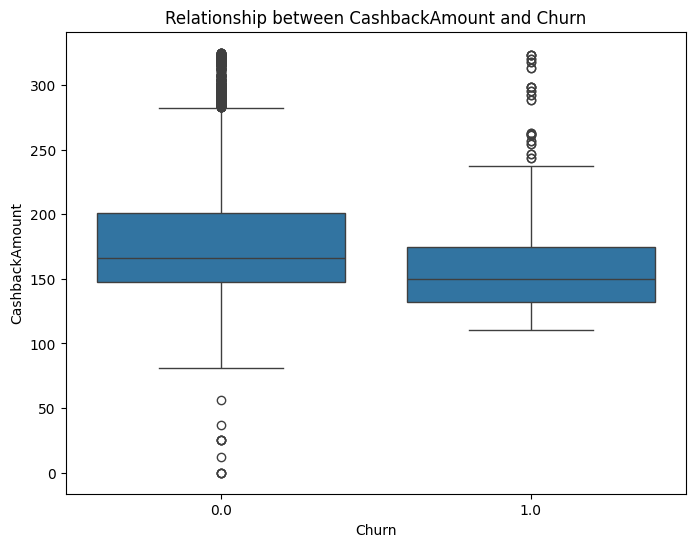

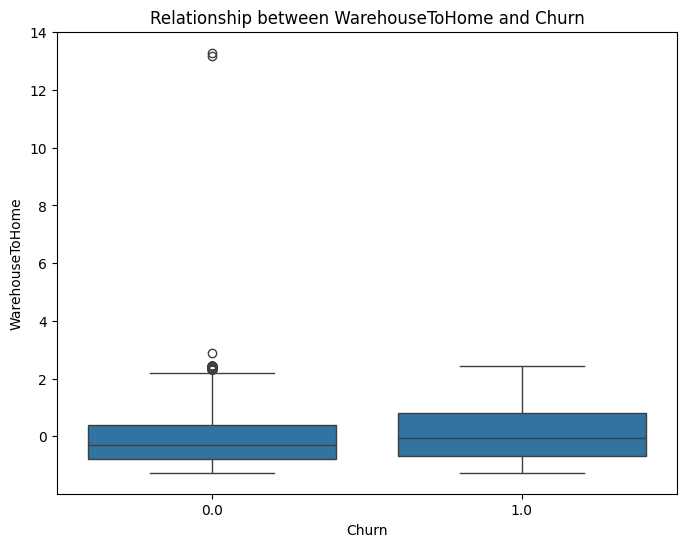

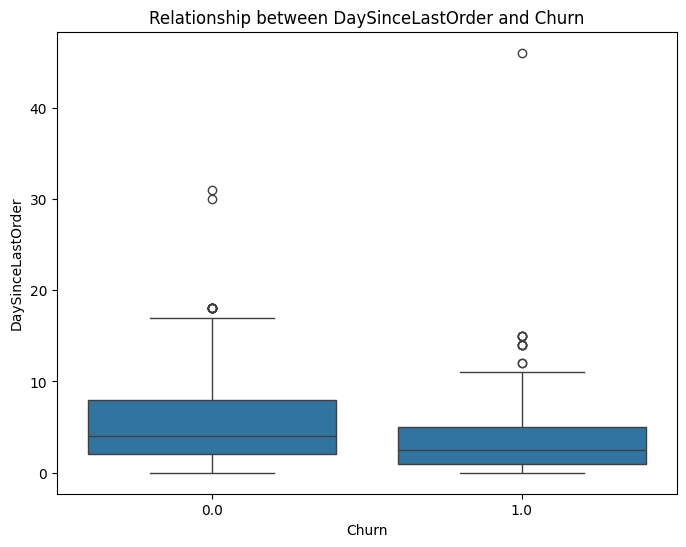

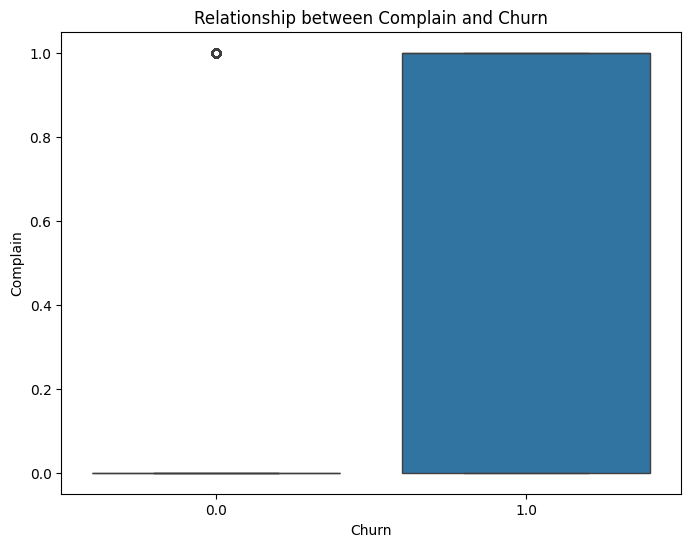

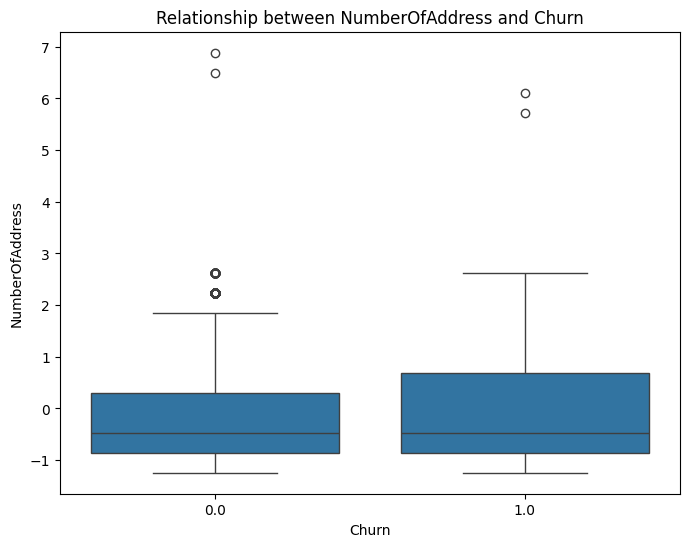

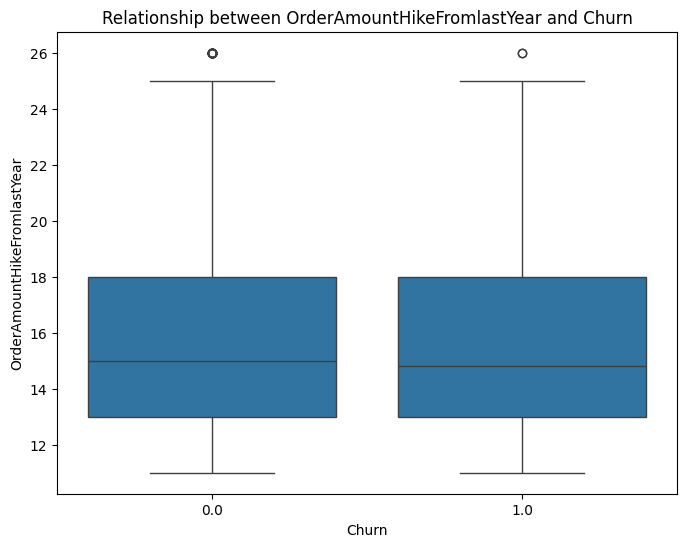

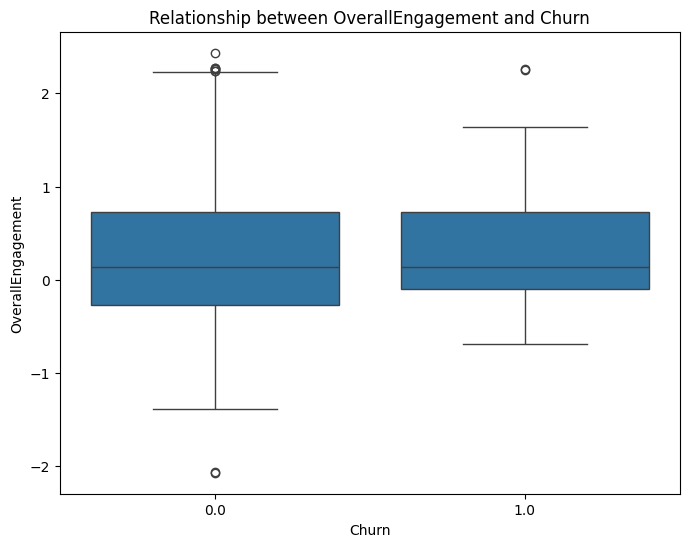

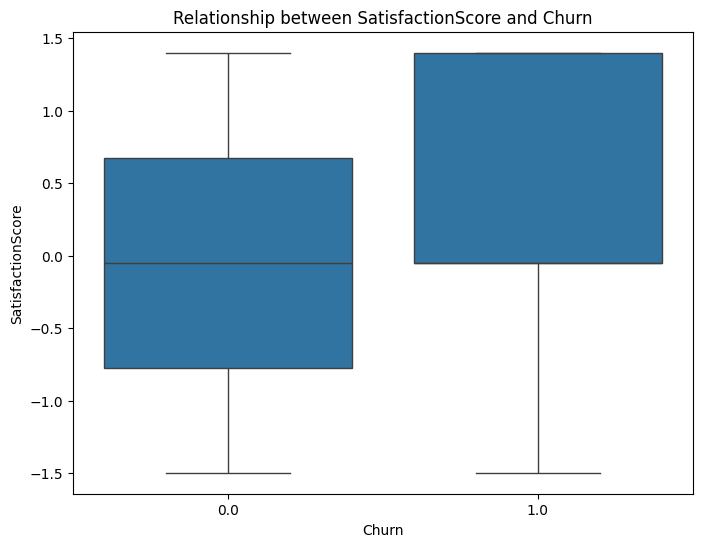

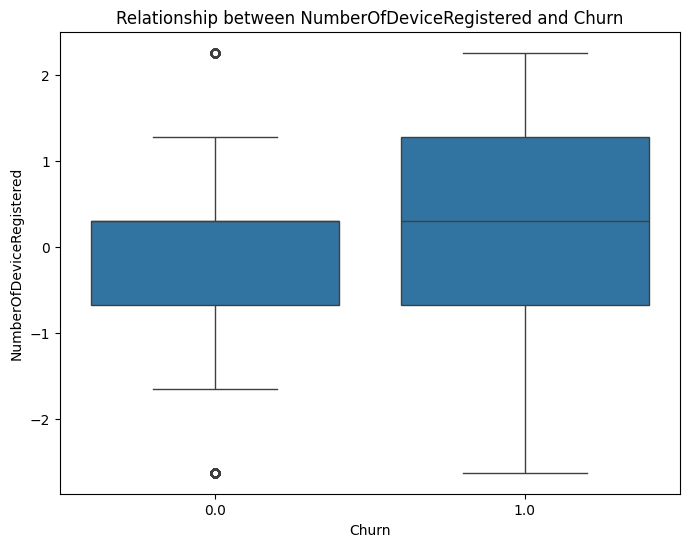

In [354]:
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=feature, data=data_imputed)
    plt.title(f'Relationship between {feature} and Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

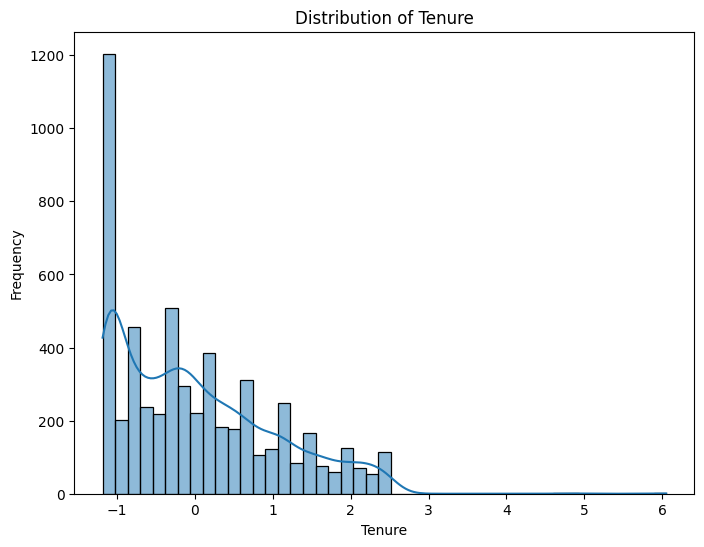

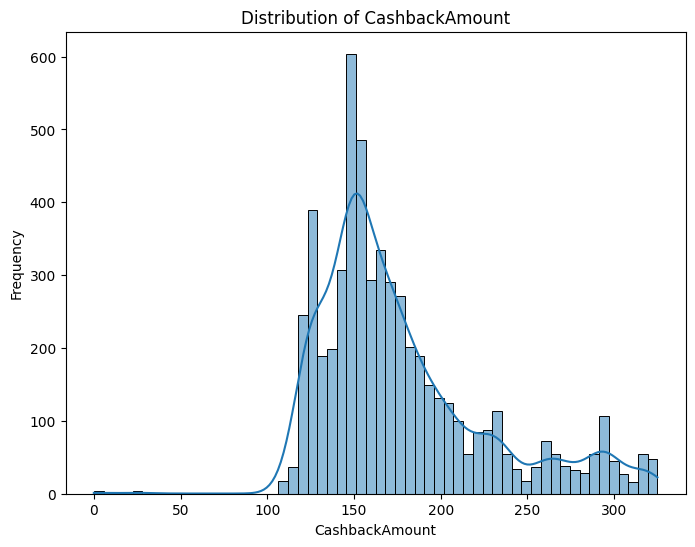

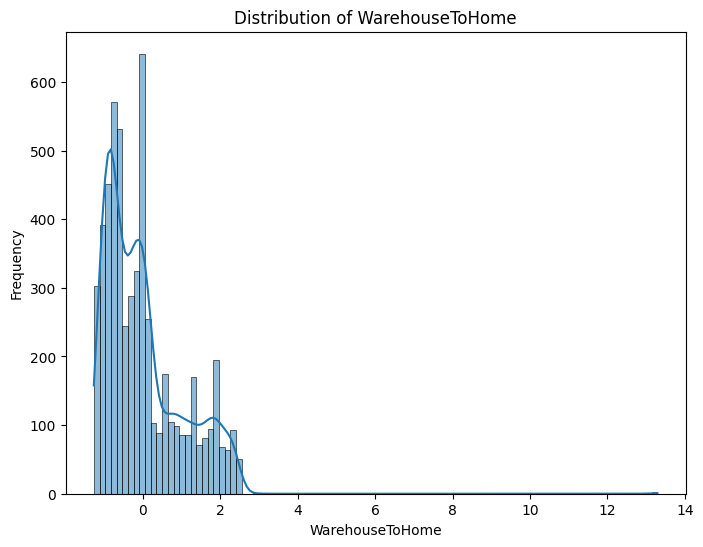

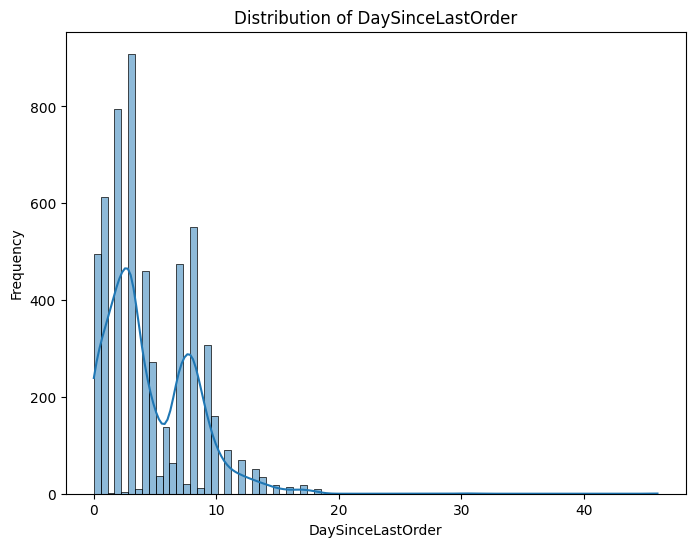

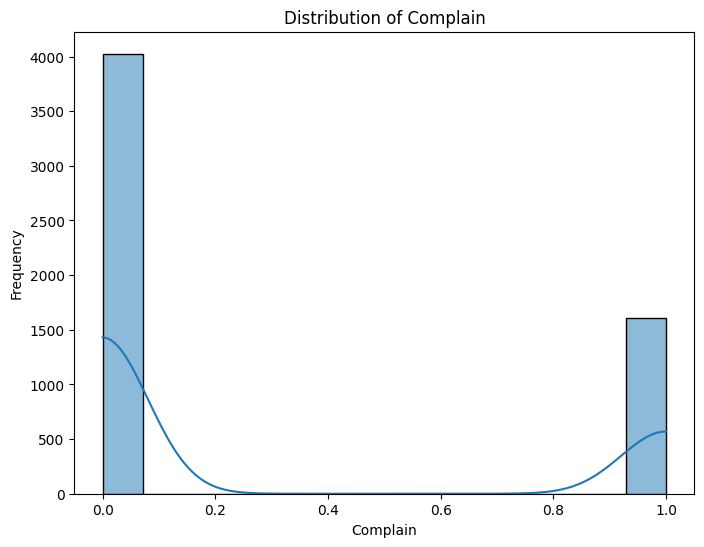

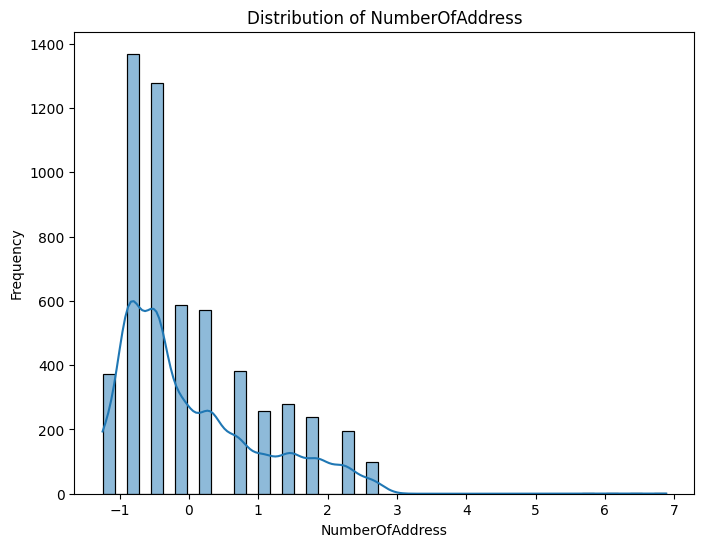

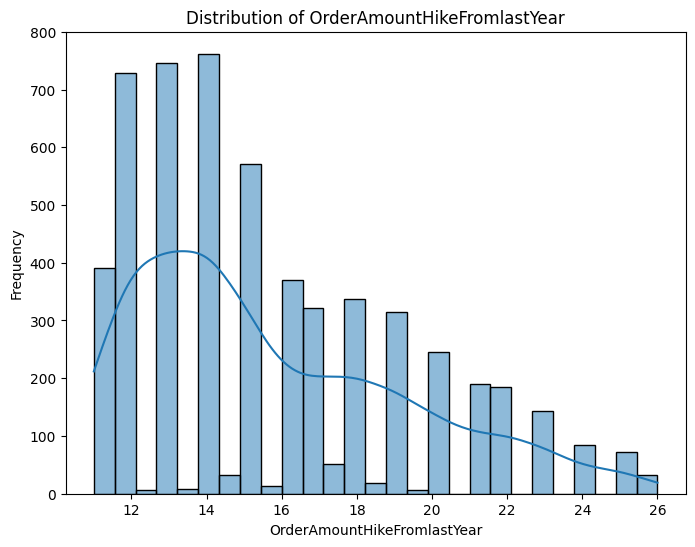

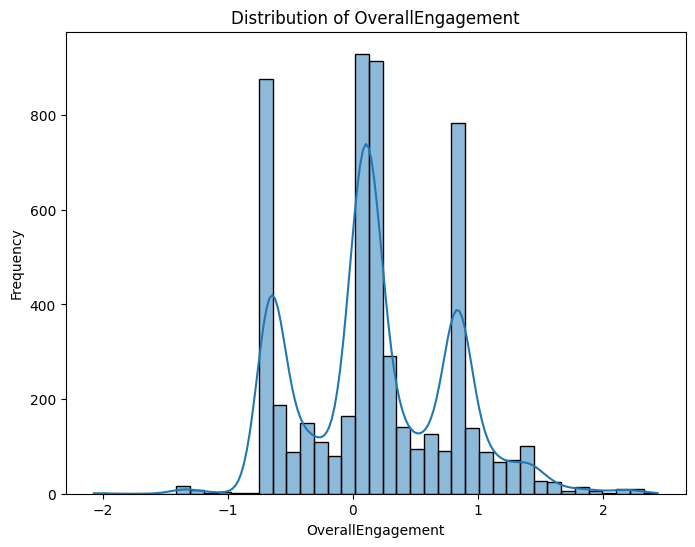

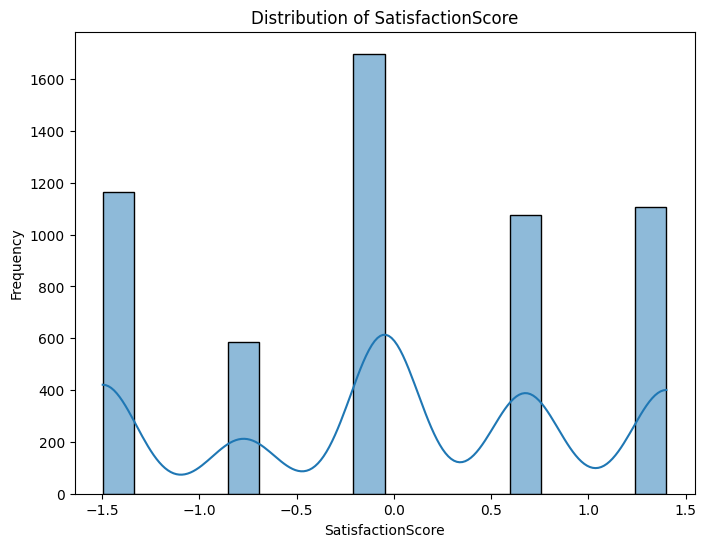

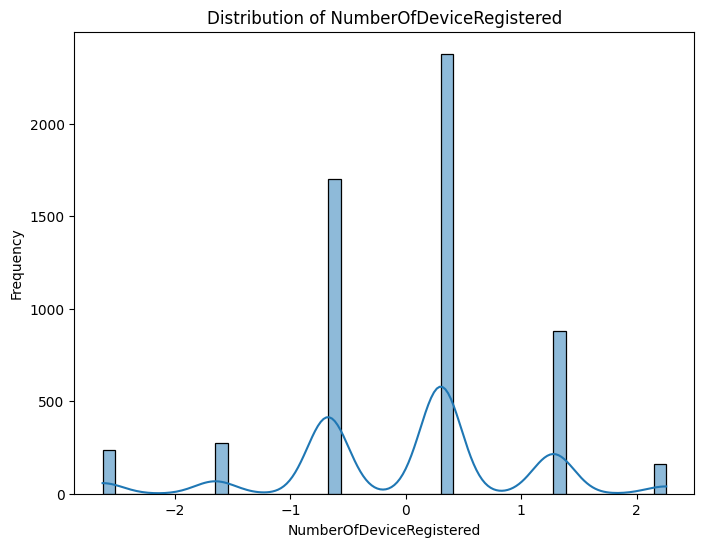

In [355]:
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_imputed[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [356]:
for feature in top_features:
    skewness = skew(data_imputed[feature])
    print(f"Skewness of {feature}: {skewness}")



Skewness of Tenure: 0.790863124438605
Skewness of CashbackAmount: 1.1495393435707737
Skewness of WarehouseToHome: 1.650055423351565
Skewness of DaySinceLastOrder: 1.1434215047790404
Skewness of Complain: 0.9530925428208437
Skewness of NumberOfAddress: 1.0883493155143302
Skewness of OrderAmountHikeFromlastYear: 0.7792213336159741
Skewness of OverallEngagement: 0.29313690698991884
Skewness of SatisfactionScore: -0.14258771974807527
Skewness of NumberOfDeviceRegistered: -0.39686287137267595


In [357]:
for feature in top_features:
    data_imputed[feature + '_log'] = np.log1p(data_imputed[feature])
    
    data_imputed[feature + '_sqrt'] = np.sqrt(data_imputed[feature])
    
    min_value = data_imputed[feature].min()
    if min_value <= 0:
        data_imputed[feature + '_boxcox'], _ = stats.boxcox(data_imputed[feature] + abs(min_value) + 1)
    else:
        data_imputed[feature + '_boxcox'], _ = stats.boxcox(data_imputed[feature])

E:\Conestoga\Sem 2\AI in business\Loblaws\.venv\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Conestoga\Sem 2\AI in business\Loblaws\.venv\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Conestoga\Sem 2\AI in business\Loblaws\.venv\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Conestoga\Sem 2\AI in business\Loblaws\.venv\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Conestoga\Sem 2\AI in business\Loblaws\.venv\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:

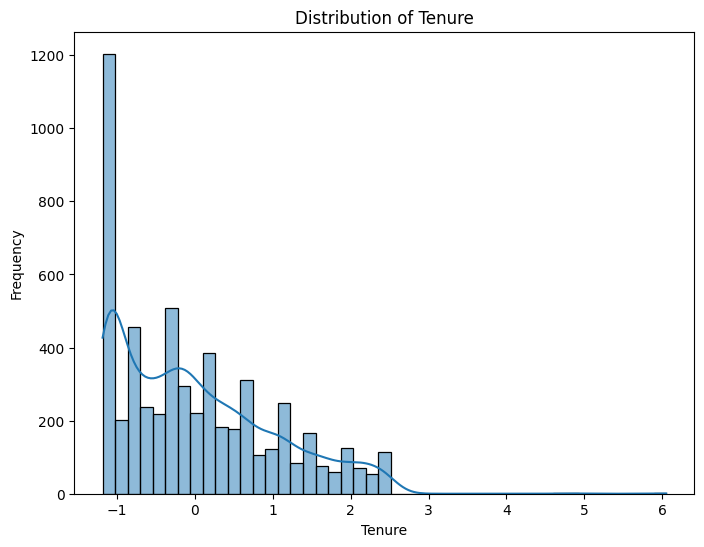

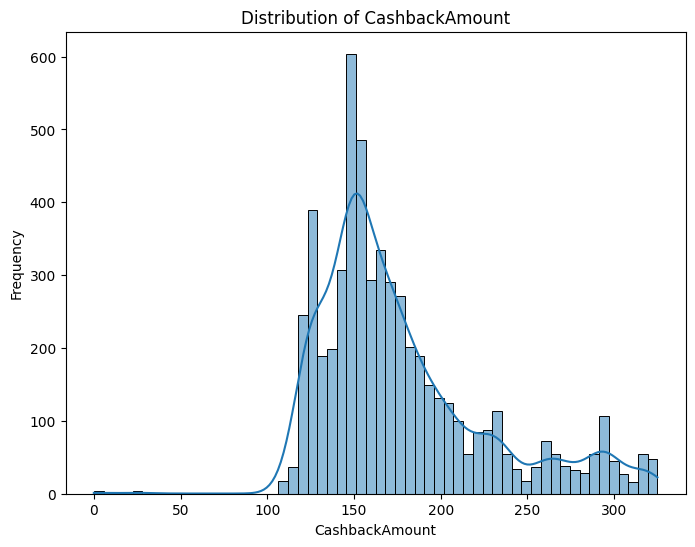

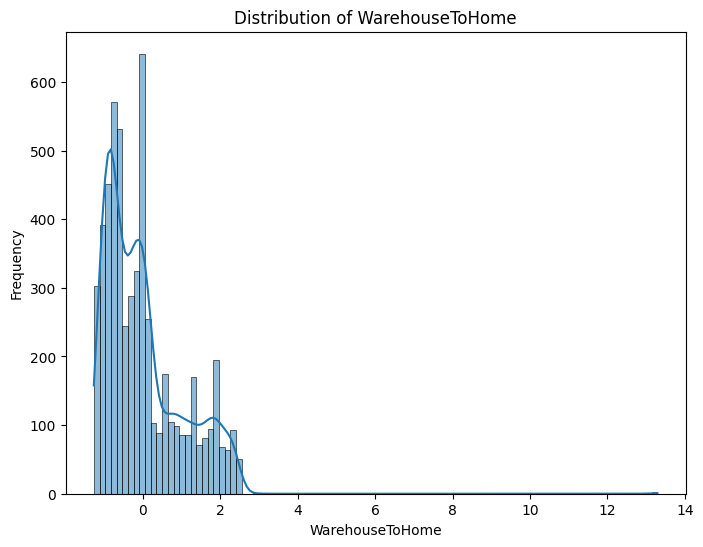

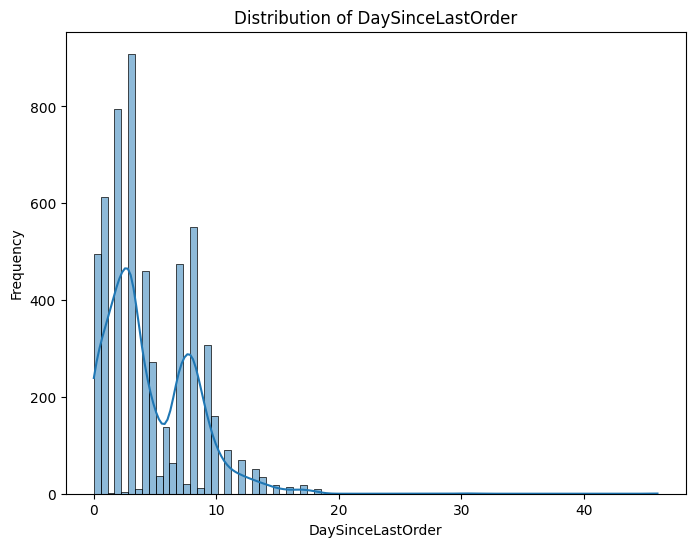

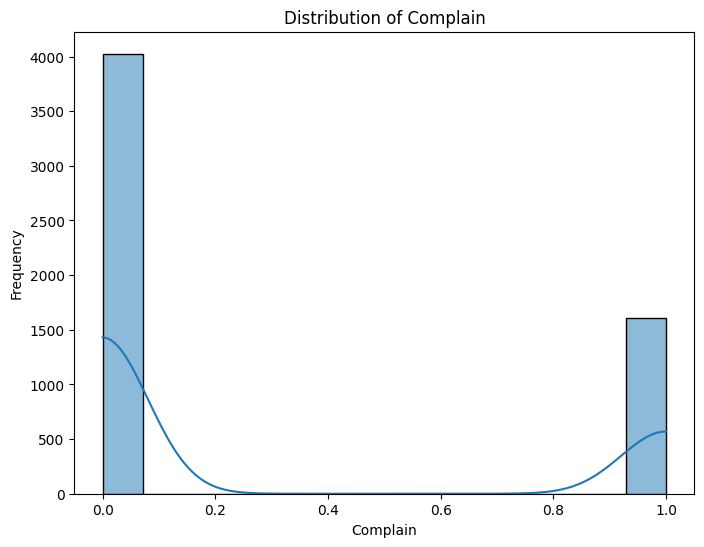

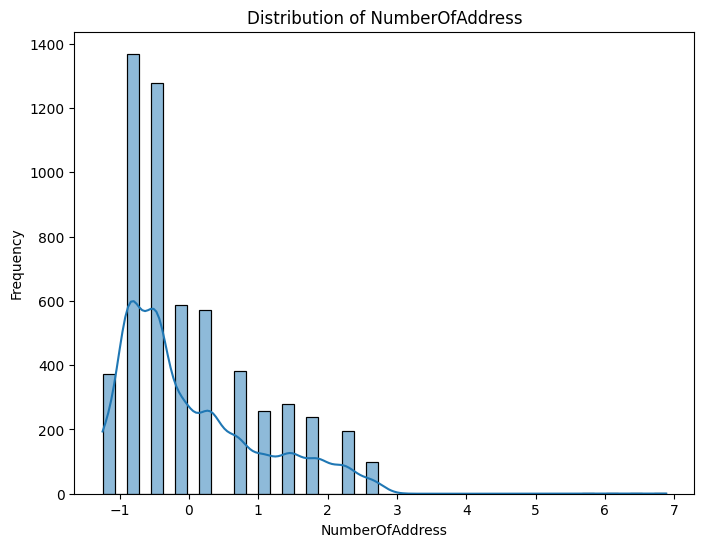

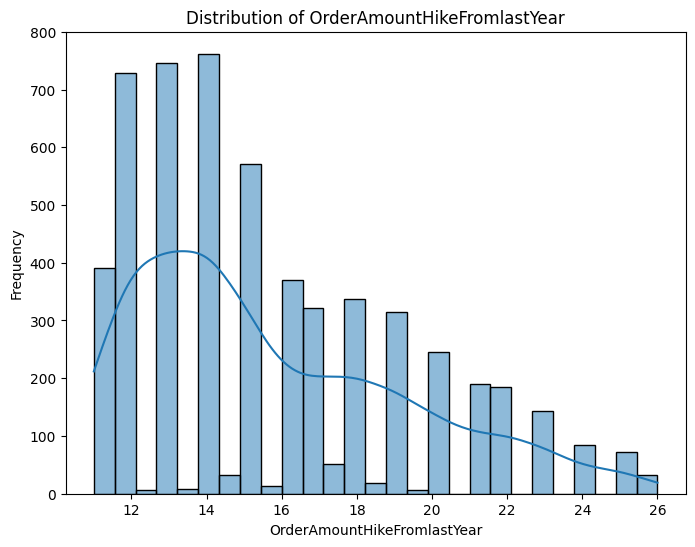

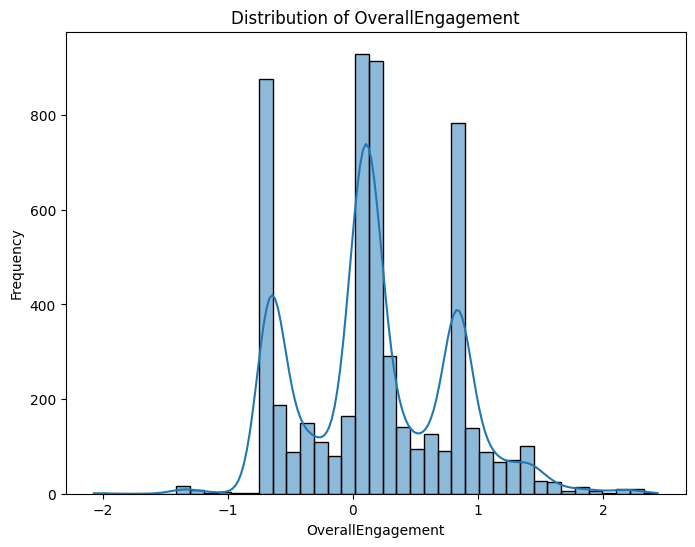

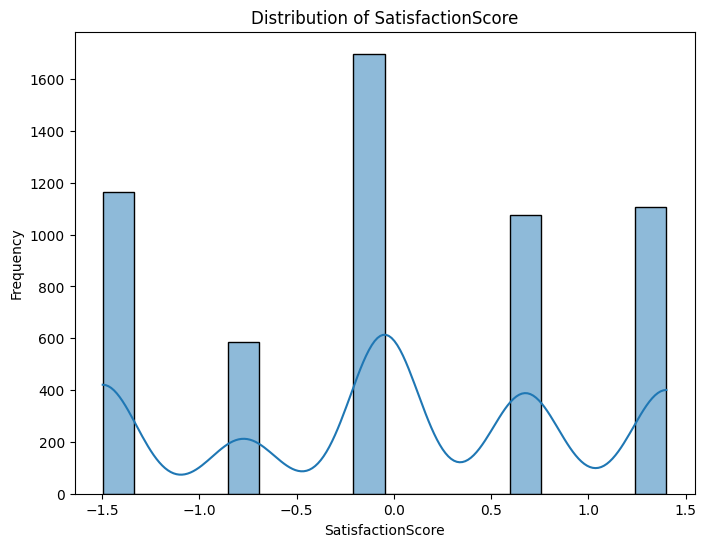

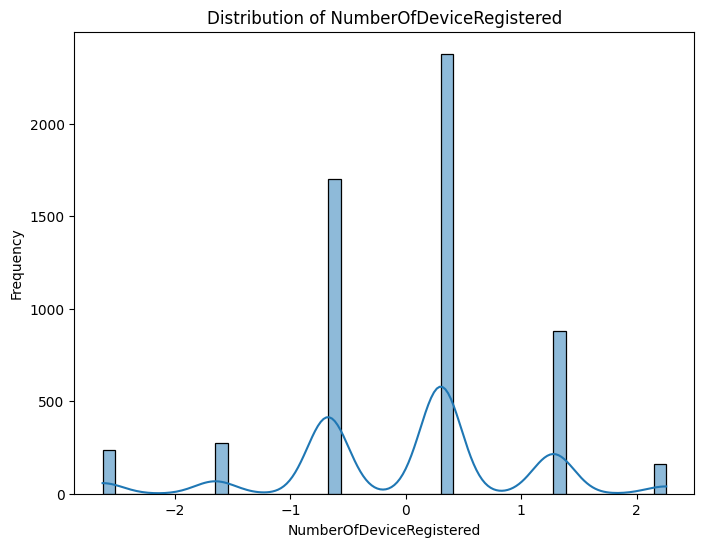

In [358]:
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_imputed[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [359]:
for feature in top_features:
    skewness = skew(data_imputed[feature])
    print(f"Skewness of {feature}: {skewness}")

Skewness of Tenure: 0.790863124438605
Skewness of CashbackAmount: 1.1495393435707737
Skewness of WarehouseToHome: 1.650055423351565
Skewness of DaySinceLastOrder: 1.1434215047790404
Skewness of Complain: 0.9530925428208437
Skewness of NumberOfAddress: 1.0883493155143302
Skewness of OrderAmountHikeFromlastYear: 0.7792213336159741
Skewness of OverallEngagement: 0.29313690698991884
Skewness of SatisfactionScore: -0.14258771974807527
Skewness of NumberOfDeviceRegistered: -0.39686287137267595


In [360]:
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [361]:
results = {}


In [362]:
for name, model in algorithms.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of churn
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }


E:\Conestoga\Sem 2\AI in business\Loblaws\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [363]:
for name, metrics in results.items():
    print(f"Metrics for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Metrics for Logistic Regression:
Accuracy: 0.9076376554174067
Precision: 0.8347107438016529
Recall: 0.5459459459459459
F1-score: 0.6601307189542484
ROC AUC: 0.8918516816497687

Metrics for Decision Tree:
Accuracy: 0.9724689165186501
Precision: 0.9230769230769231
Recall: 0.9081081081081082
F1-score: 0.9155313351498637
ROC AUC: 0.9466151592612805

Metrics for Random Forest:
Accuracy: 0.9671403197158082
Precision: 0.9868421052631579
Recall: 0.8108108108108109
F1-score: 0.8902077151335311
ROC AUC: 0.9861877818307149

Metrics for Gradient Boosting:
Accuracy: 0.9271758436944938
Precision: 0.8705035971223022
Recall: 0.654054054054054
F1-score: 0.7469135802469136
ROC AUC: 0.9404026768532613



In [364]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
seq_model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(200, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

E:\Conestoga\Sem 2\AI in business\Loblaws\.venv\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [365]:
seq_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [366]:
early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)


In [367]:
history = seq_model.fit(X_train_scaled, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7063 - loss: 0.5885 - val_accuracy: 0.8213 - val_loss: 0.4076
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.4017 - val_accuracy: 0.8535 - val_loss: 0.3523
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.3547 - val_accuracy: 0.8624 - val_loss: 0.3361
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.3346 - val_accuracy: 0.8646 - val_loss: 0.3176
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - loss: 0.3085 - val_accuracy: 0.8713 - val_loss: 0.3063
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8724 - loss: 0.3146 - val_accuracy: 0.8779 - val_loss: 0.3061
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.2986 - val_accuracy: 0.8846 - val_loss: 0.2997
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.2981 - val_accuracy: 0.8912 - val_loss:

In [368]:
test_loss, test_accuracy = seq_model.evaluate(X_test_scaled, y_test)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.9288 - loss: 0.2095


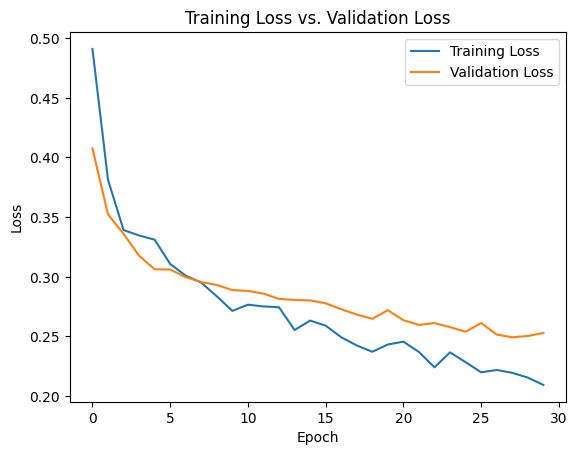

In [369]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Validation Loss')
plt.legend()
plt.show()

In [370]:
y_threshold_pred = seq_model.predict(X_test_scaled)

learned_threshold =y_threshold_pred.mean()  

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [371]:
learned_threshold

0.1420962